# Investigating Stock Market Prediction using Univariate Time Series
### with Stacked LSTM, BiLSTM, and NeuralProphet


---

# 0.1 Import Libraries

In [1]:
    #sections 00 - 1.3
import numpy as np                          #numpy
import pandas as pd                         #pandas
import statsmodels.api as sum               #statsmodels
import statsmodels.formula.api as smf
import sklearn.metrics as smetric           #sklearn
import seaborn as sns                       #seaborne
import matplotlib as plt                    #matplotlib
from matplotlib import pyplot as plt        
%matplotlib inline
    #sections 2.1 - 
from matplotlib.pylab import rcParams       #rcParams from matplotlib
from datetime import datetime               #datetime
import warnings                             #warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go           #plotly

---
# 1 Loading Dataset, Preprocessing and Visualising 


## 1.1 Load Stock Data

In [2]:
data = pd.read_csv('Data//AAPL.csv')    #importing data from csv file
print(data.head())                      #displaying first 5 rows of data

        Date      Open      High       Low     Close  Adj Close     Volume
0  4/01/2010  7.622500  7.660714  7.585000  7.643214   6.562589  493729600
1  5/01/2010  7.664286  7.699643  7.616071  7.656429   6.573936  601904800
2  6/01/2010  7.656429  7.686786  7.526786  7.534643   6.469368  552160000
3  7/01/2010  7.562500  7.571429  7.466071  7.520714   6.457407  477131200
4  8/01/2010  7.510714  7.571429  7.466429  7.570714   6.500340  447610800


In [3]:
df = pd.read_csv('Data//AAPL.csv')      #assign new data frame for preprocessing 

if df.duplicated().sum().any() == True:     #if duplicates print the sum of duplicates
    print(__builtins__.sum(df.duplicated())) 
else:                                       #if no duplicates print False
    print('False')                          

False


In [4]:
data.info()     #gives data set insights

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2980 entries, 0 to 2979
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2980 non-null   object 
 1   Open       2980 non-null   float64
 2   High       2980 non-null   float64
 3   Low        2980 non-null   float64
 4   Close      2980 non-null   float64
 5   Adj Close  2980 non-null   float64
 6   Volume     2980 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 163.1+ KB


## 1.2 Preprocess

In [5]:
def tableinquiry(df):       #setup function for returning table of dataframe insights
    print('Dataset Shape: {df.shape()}')                    #print dataset dimensions
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])    #create summary column for data types
    summary = summary.reset_index()                         #create summary column for index
    summary['Name'] = summary['index']                      #assign column name to index
    summary = summary[['Name', 'dtypes']]                   #reshape table to only name and data type columns
    summary['Missing'] = df.isnull().sum().values           #create column for sum of missing datapoints
    summary['Uniques'] = df.nunique().values                #create column for sum of unique values
    summary['Duplicates'] = df.duplicated().sum()           #create column for sum of duplicate datapoints
    return summary          #return insight table
tableinquiry(df)

Dataset Shape: {df.shape()}


,Name,dtypes,Missing,Uniques,Duplicates
0,Date,object,0,2980,0
1,Open,float64,0,2856,0
2,High,float64,0,2837,0
3,Low,float64,0,2853,0
4,Close,float64,0,2862,0
5,Adj Close,float64,0,2939,0
6,Volume,int64,0,2973,0


## 1.3 Visual Exploration

In [6]:
df.describe()   #statistical measures for dataset elements

,Open,High,Low,Close,Adj Close,Volume
count,2980.000000,2980.000000,2980.000000,2980.000000,2980.000000,2.980000e+03
mean,41.024595,41.444840,40.602074,41.040715,39.343258,2.726309e+08
std,35.489778,35.893334,35.079680,35.506802,36.036754,2.265477e+08
min,6.870357,7.000000,6.794643,6.858929,5.889190,4.544800e+07
25%,18.336607,18.557768,18.146339,18.391518,16.060280,1.106592e+08
50%,28.048750,28.316250,27.805000,28.084999,25.920846,1.869154e+08
75%,47.373126,47.687499,46.905000,47.306875,45.945325,3.734612e+08
max,156.979996,157.259995,154.389999,156.690002,156.690002,1.880998e+09


               Open      High       Low     Close  Adj Close    Volume
Open       1.000000  0.999897  0.999853  0.999753   0.999648 -0.483814
High       0.999897  1.000000  0.999818  0.999871   0.999774 -0.482251
Low        0.999853  0.999818  1.000000  0.999874   0.999770 -0.486630
Close      0.999753  0.999871  0.999874  1.000000   0.999898 -0.484570
Adj Close  0.999648  0.999774  0.999770  0.999898   1.000000 -0.483597
Volume    -0.483814 -0.482251 -0.486630 -0.484570  -0.483597  1.000000


<Axes: >

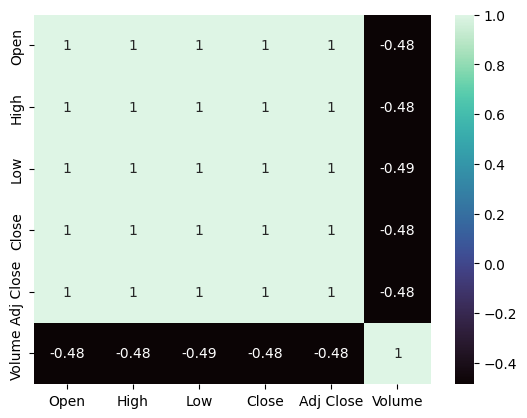

In [7]:
print(df.corr(numeric_only=True))   #pairwise correlation for data set with parameter to target only numeric values
                                    #values of +- 1 indicate strong co variable dependance. + = increase and decrease toghether, - = diverge
sns.heatmap(df.corr(numeric_only=True), cmap=("mako"), annot=True) #heatmap for pairwise correlation  

Text(0.5, 1.0, 'Correlation between Close and Volume')

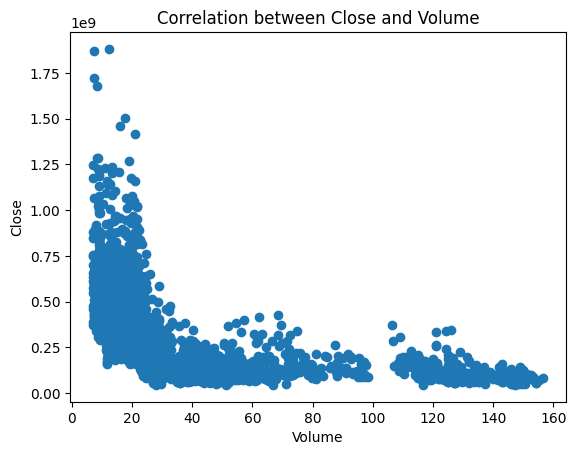

In [8]:
plt.scatter(df['Close'], df['Volume'])              #plot of close as a function of volume
plt.ylabel("Close")
plt.xlabel("Volume")
plt.title("Correlation between Close and Volume")       

Text(0.5, 1.0, 'Correlation between High and Low')

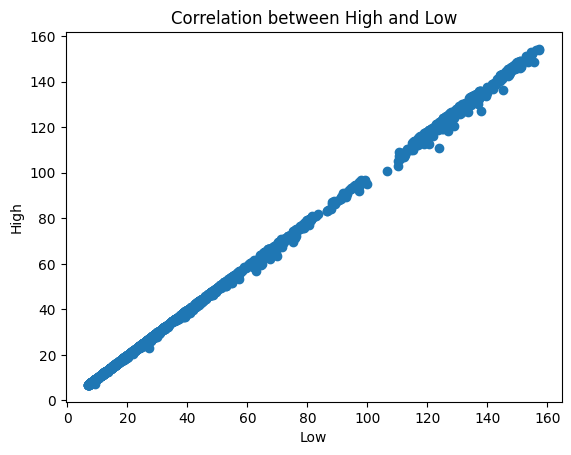

In [9]:
plt.scatter(df['High'], df['Low'])              #plot of High as a function of Low
plt.ylabel("High")
plt.xlabel("Low")
plt.title("Correlation between High and Low")   

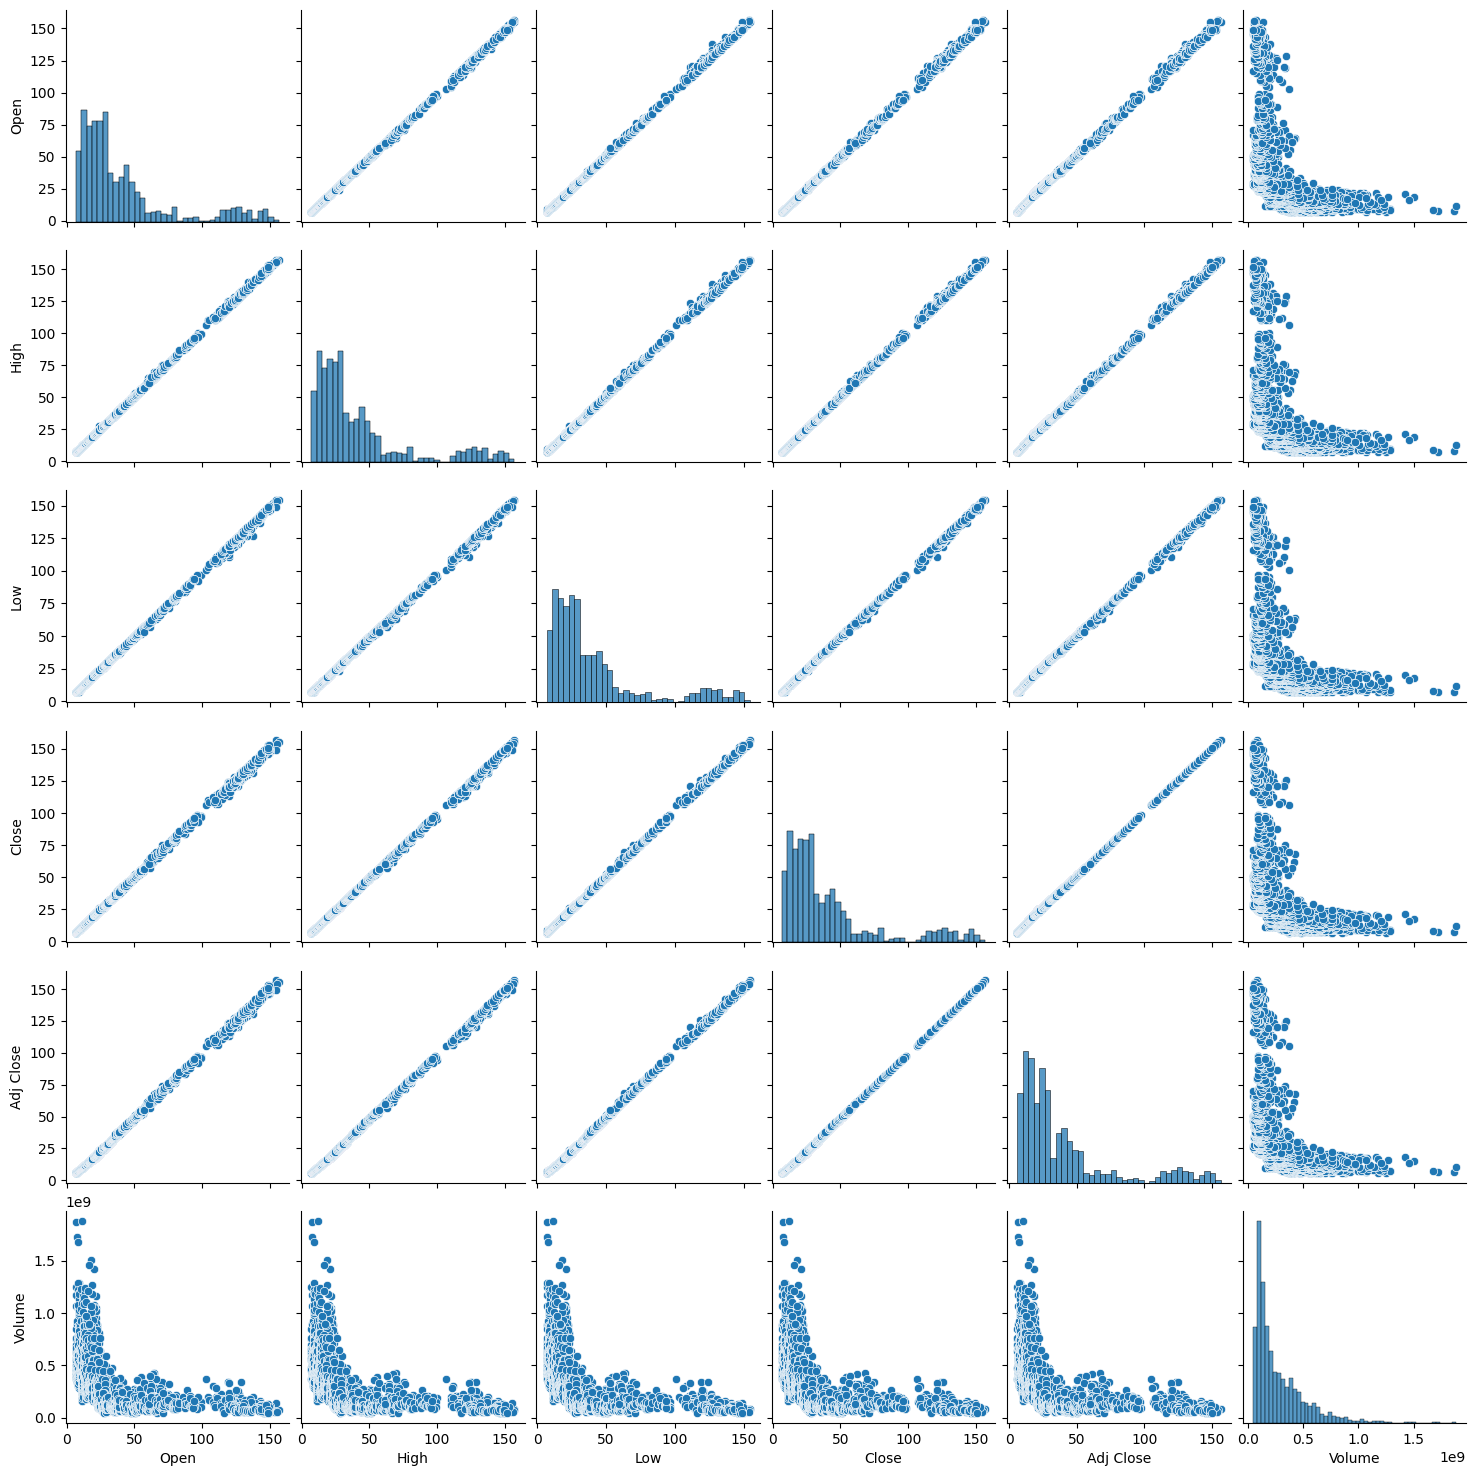

In [10]:
sns.pairplot(df)    #summary of each variables co-dependancy

array([[<Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'High'}>],
       [<Axes: title={'center': 'Low'}>,
        <Axes: title={'center': 'Close'}>],
       [<Axes: title={'center': 'Adj Close'}>,
        <Axes: title={'center': 'Volume'}>]], dtype=object)

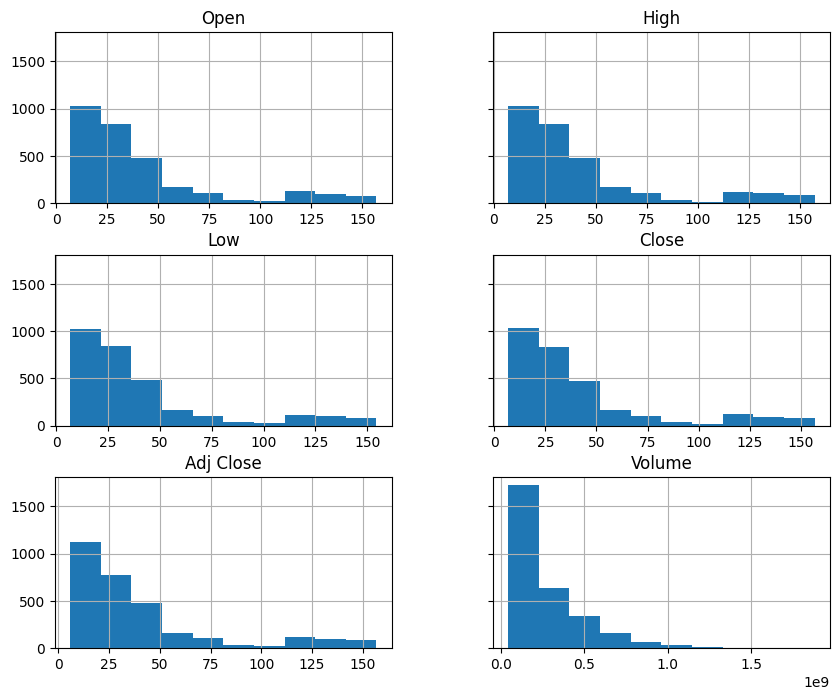

In [11]:
df.hist(figsize=(10,8), sharey=True)    #histogram of each variables frequency with scaled y axis

In [12]:
figure = go.Figure(data=[go.Candlestick(x=data["Date"],                             #plotting interactable candlestick plot for stock price
                                        open=data["Open"], high=data["High"], 
                                        low=data["Low"], close=data["Close"])])   
figure.update_layout(title = "Apple Stock Price Analysis", xaxis_rangeslider_visible=False)
figure.show()

---
# 2 Exploratory Data Analysis



## 2.1 Set-up and plot exploration

In [13]:
data = pd.read_csv("Data//AAPL.csv")        #reiterated to allow skipping of section 1
data['Date'] = pd.to_datetime(data['Date'], infer_datetime_format=True, dayfirst=True)  #convert date column entries into interpretable date format
display(tableinquiry(data))                 #double checking for misisng values, duplicates and type errors
data = data.set_index(['Date'])         #set the index of the data to the date
display(data.head())                    #display newly date indexed dataframe
data.info()         #dataframe insights

Dataset Shape: {df.shape()}


,Name,dtypes,Missing,Uniques,Duplicates
0,Date,datetime64[ns],0,2980,0
1,Open,float64,0,2856,0
2,High,float64,0,2837,0
3,Low,float64,0,2853,0
4,Close,float64,0,2862,0
5,Adj Close,float64,0,2939,0
6,Volume,int64,0,2973,0


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.562589,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.573936,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.469368,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.457407,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.500340,447610800


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2980 entries, 2010-01-04 to 2021-11-02
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2980 non-null   float64
 1   High       2980 non-null   float64
 2   Low        2980 non-null   float64
 3   Close      2980 non-null   float64
 4   Adj Close  2980 non-null   float64
 5   Volume     2980 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 163.0 KB


<Axes: xlabel='Date', ylabel='Adj Close'>

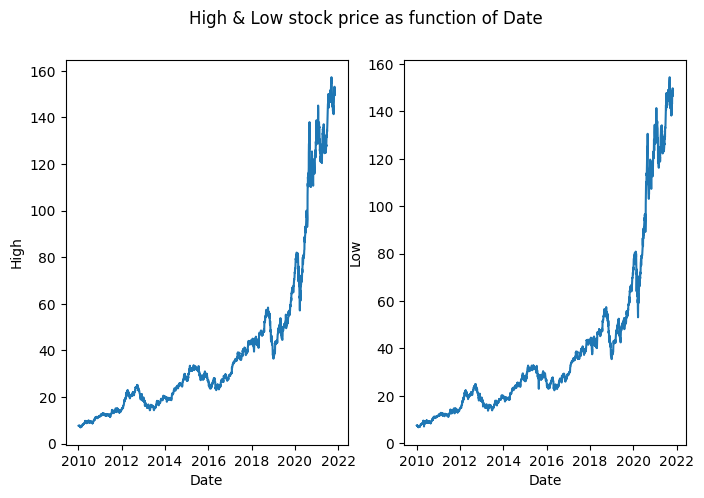

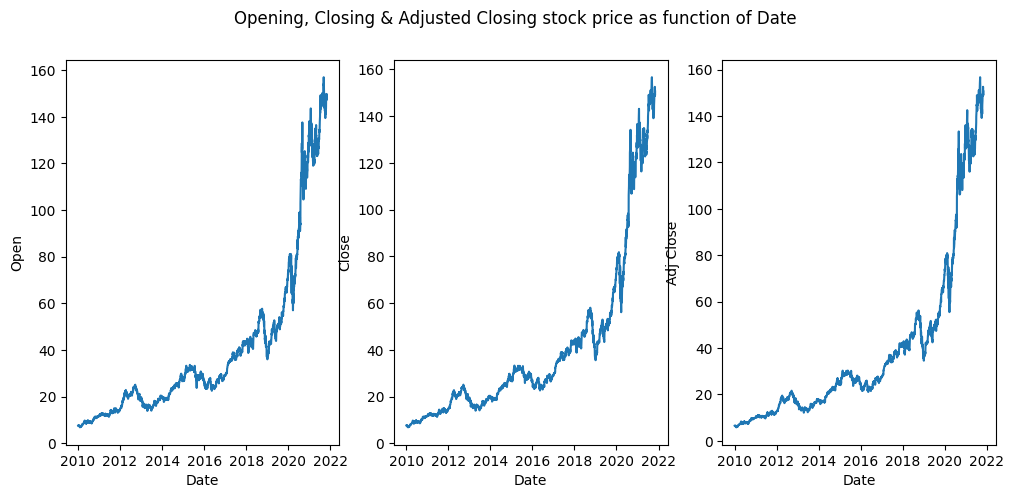

In [14]:
fig1, axes = plt.subplots(1,2, figsize=(8,5))               #setup a 1x2 figure space
fig1.suptitle('High & Low stock price as function of Date') #set figure space title
sns.lineplot(ax=axes[0], data = data, x = 'Date', y = 'High')       #plot high x date
sns.lineplot(ax=axes[1], data = data, x = 'Date', y = 'Low')        #plot low  x date

fig2, axes = plt.subplots(1,3, figsize=(12,5))              #setup a 1x3 figure space
fig2.suptitle('Opening, Closing & Adjusted Closing stock price as function of Date')
sns.lineplot(ax=axes[0], data = data, x = 'Date', y = 'Open')       #plot     open  x date
sns.lineplot(ax=axes[1], data = data, x = 'Date', y = 'Close')      #plot     close x date
sns.lineplot(ax=axes[2], data = data, x = 'Date', y = 'Adj Close')  #plot adj close x date

Text(0.5, 1.0, 'Volume of stock trades as function of Date')

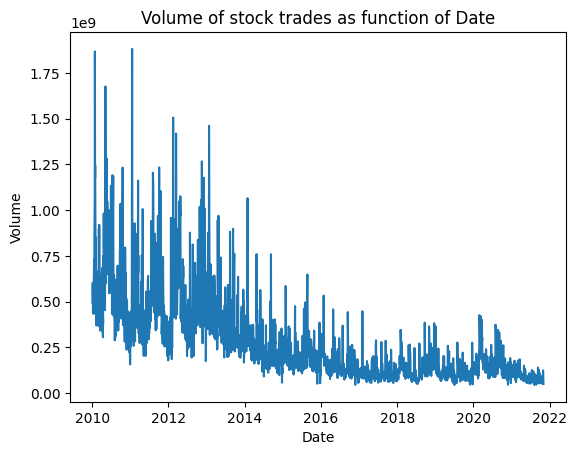

In [15]:
sns.lineplot(data = data, x = 'Date', y = 'Volume').set_title('Volume of stock trades as function of Date') #plot volume x date

## 2.2 Rolling Mean

In [16]:
rolmean=data.rolling(window=12).mean()  #calculate a rolling mean at an interval of 12 date datapoints
rolstd=data.rolling(window=12).std()    #calculate a rolling std at an interval of 12 date datapoints
print(rolmean.head(15))     #print first 15 rolling mean values
print(rolstd.head(15))      #print first 15 rolling std values

                Open      High       Low     Close  Adj Close        Volume
Date                                                                       
2010-01-04       NaN       NaN       NaN       NaN        NaN           NaN
2010-01-05       NaN       NaN       NaN       NaN        NaN           NaN
2010-01-06       NaN       NaN       NaN       NaN        NaN           NaN
2010-01-07       NaN       NaN       NaN       NaN        NaN           NaN
2010-01-08       NaN       NaN       NaN       NaN        NaN           NaN
2010-01-11       NaN       NaN       NaN       NaN        NaN           NaN
2010-01-12       NaN       NaN       NaN       NaN        NaN           NaN
2010-01-13       NaN       NaN       NaN       NaN        NaN           NaN
2010-01-14       NaN       NaN       NaN       NaN        NaN           NaN
2010-01-15       NaN       NaN       NaN       NaN        NaN           NaN
2010-01-19       NaN       NaN       NaN       NaN        NaN           NaN
2010-01-20  

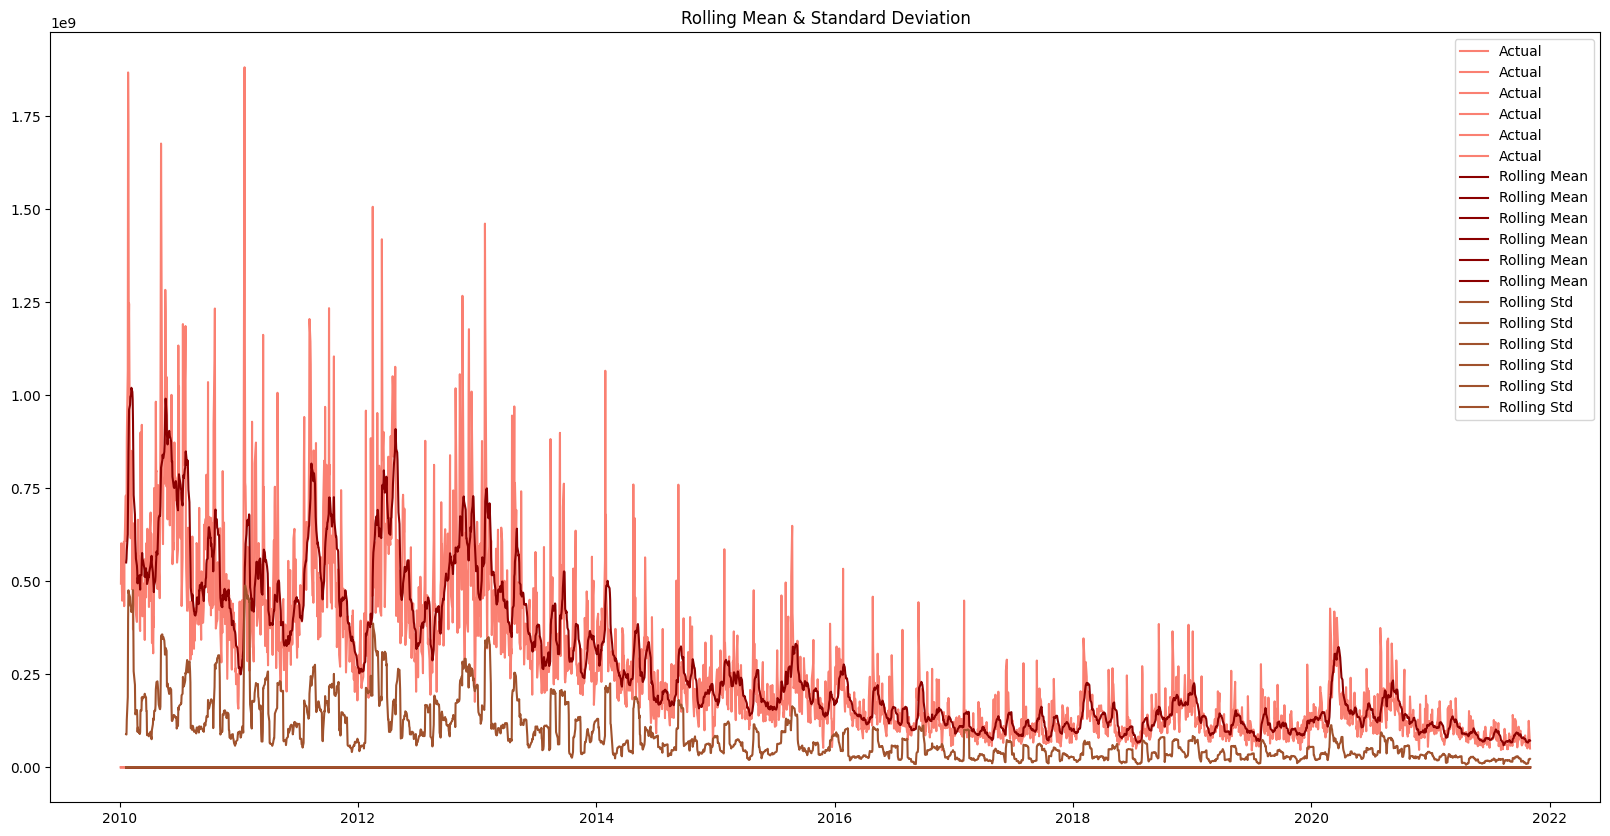

In [17]:
plt.figure(figsize=(20,10))             #initiate figure area   NOTE: VOLUME VARIABLE DOMINATES VISUAL REPRESENTATION
actual=plt.plot(data, color='salmon', label='Actual')              #plot actual data
mean_6=plt.plot(rolmean, color='darkred', label='Rolling Mean')   #plot rolling mean
std_6=plt.plot(rolstd, color='sienna', label='Rolling Std')      #plot rolling std
plt.legend(loc='best')                                      #add legend
plt.title('Rolling Mean & Standard Deviation')              #add title
plt.show(block=False)                                   #I do not know why but the plot generates 0.1 second faster with this ?

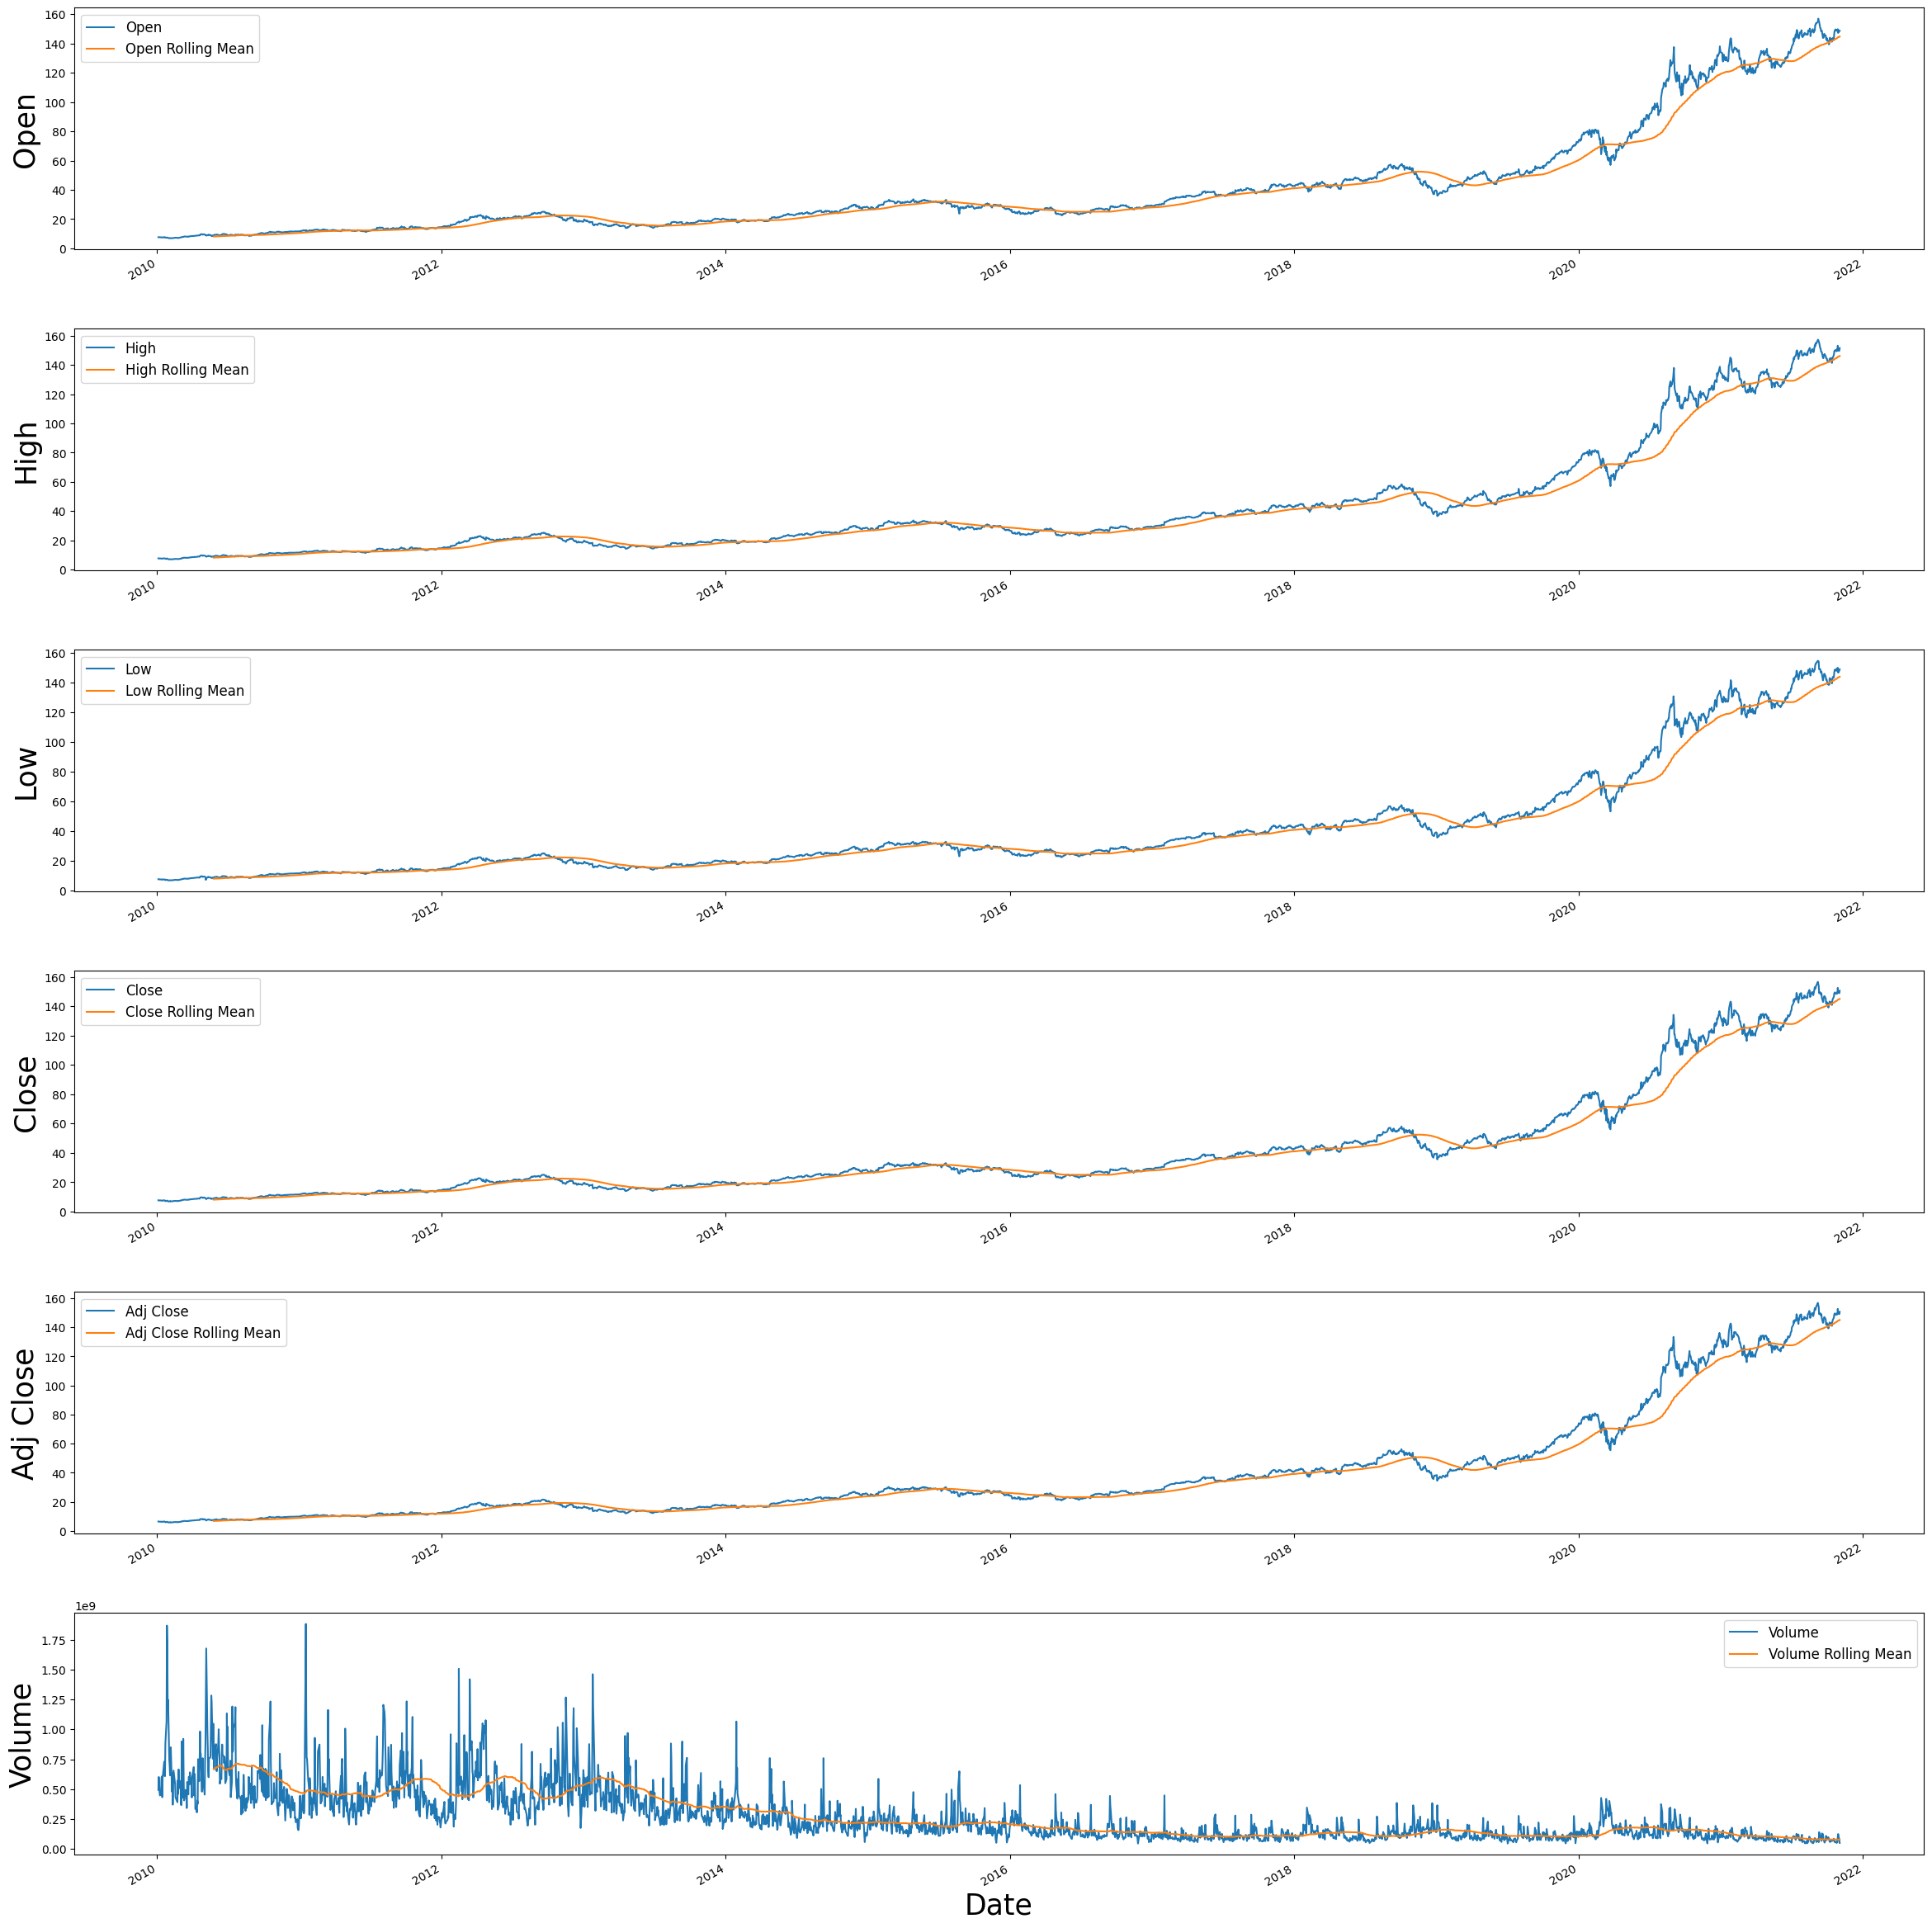

In [18]:
col_names = data.columns        #assigning new variable for column names

fig = plt.figure(figsize=(24, 24))  #initializing a figure area
for i in range(6):                  #looping over the 6 unique variables
    ax = fig.add_subplot(6,1,i+1)   #adding subplot for each variable
    ax.plot(data.iloc[:,i],label=col_names[i])          #plotting each variable
    data.iloc[:,i].rolling(100).mean().plot(label=col_names[i]+ ' Rolling Mean')   #plotting the rolling mean for each variable   
    ax.set_ylabel(col_names[i],fontsize=25)     #setting the ylabel for each plot
    ax.set_xlabel("")                           #setting empty xlabel           
    plt.legend(prop={'size': 12})           #add legend
ax.set_xlabel("Date", fontsize=25)          #adding date x label to bottom plot only
fig.tight_layout(pad=3.0)
plt.show()

Text(0.5, 1.0, 'Colliniarity Heatmap')

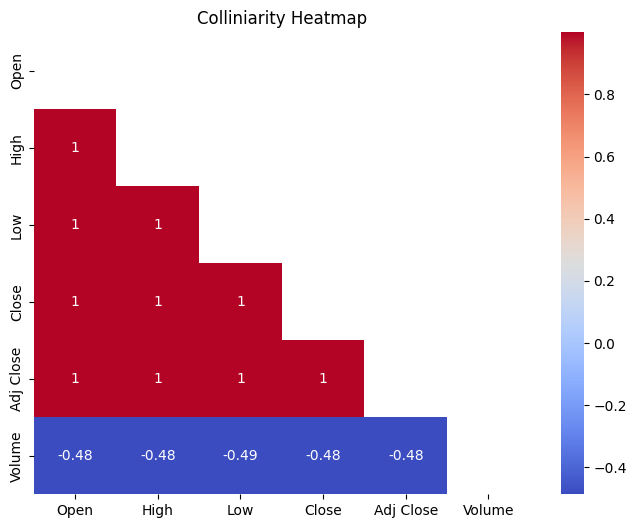

In [19]:
fig = plt.figure(figsize=(8,6))     #heatmap to check multicolliniarity
matrix = np.triu(data.corr())
ax = sns.heatmap(data.corr(),annot=True,annot_kws={"size":10},mask=matrix,cmap=('coolwarm'))
ax.tick_params(labelsize=10)
ax.set_title('Colliniarity Heatmap')

In [31]:
adj_close_data= data.drop(axis=1,labels=['Open','High','Low','Close','Volume'])    #dropping all data columns excelt adjusted closing price
adj_close_data = adj_close_data.reindex(columns=['Adj Close'])
display(adj_close_data)
##Resample Data to Monthly instead of Daily by Aggregating Using Mean
monthly_mean = adj_close_data['Adj Close'].resample('M').mean()
monthly_data = monthly_mean.to_frame()
monthly_data['Year'] = monthly_data.index.year
monthly_data['Month'] = monthly_data.index.strftime('%B')
monthly_data['DayOfWeek'] = monthly_data.index.strftime('%A')
monthly_data['Quarter'] = monthly_data.index.quarter
monthly_data

,Adj Close
Date,
2010-01-04,6.562589
2010-01-05,6.573936
2010-01-06,6.469368
2010-01-07,6.457407
2010-01-08,6.500340
...,...
2021-10-27,148.850006
2021-10-28,152.570007
2021-10-29,149.800003


,Adj Close,Year,Month,DayOfWeek,Quarter
Date,,,,,
2010-01-31,6.369562,2010,January,Sunday,1
2010-02-28,6.096047,2010,February,Sunday,1
2010-03-31,6.850866,2010,March,Wednesday,1
2010-04-30,7.701438,2010,April,Friday,2
2010-05-31,7.711035,2010,May,Monday,2
...,...,...,...,...,...
2021-07-31,144.922394,2021,July,Saturday,3
2021-08-31,148.137819,2021,August,Tuesday,3
2021-09-30,148.306190,2021,September,Thursday,3
